# Screening active Learning for Multiple Classifers

The notebook presents results of screening active learning for classifiers built on MULTIPLE predicates.
As a classifier, we used Linear SVM with standard settings provided by scikit-learn, namely penalty=’l2’, loss=’squared_hinge’, C=1.0, random_state=123, and class_weight='balanced' (to take into account unbalanced property of the data). LossRatio = 10

For handling unbalanced data, the undersampling of a majority class used. The lower bound of the proportion of positive class is set to 0.333. The x-axis is the "number of queried items". Note that this might not be the same as the number of training items since we want to keep the minimal proportion of positive items and therefore might not include some labeled items to the training set.

Results are based on 10-fold cross validation, p_out=0.65

In [1]:
import pandas as pd

%matplotlib inline  
import matplotlib.pyplot as plt

In [9]:
def plot_charts(df, metrics, algos, pred):
    fig, ax = plt.subplots(nrows=2, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(20,12))
    x = df.loc[df['sampling_strategy'] == algos[0]]['num_items_queried'].values
    for i, m in zip([(0, 0), (0, 1), (1, 0), (1, 1)], metrics):
        for alg, c, l in zip(algos, ['blue', 'black'], ['-', '--']):
            y = df.loc[df['sampling_strategy'] == alg][m+'_mean'].values
            y_std = df.loc[df['sampling_strategy'] == alg][m+'_std'].values
            ax[i].plot(x, y, label=alg, color=c, linestyle=l)
            ax[i].fill_between(x, y-y_std, y+y_std, alpha=0.07, color=c)
            ax[i].set_xlabel('number of queried items', size=14)
            ax[i].set_ylabel(m, size=14)
            ax[i].legend(loc='lower right', fontsize=14)
            ax[i].set_title('{} on predicates {}+{}'.format(m, pred[0],pred[1]), size=15)
            
def plot(file_name, pred):
    plot_charts(pd.read_csv('../data/multi_classifier_al/{}'.format(file_name)),
                ['loss', 'f_beta', 'precision', 'recall'], 
                ['uncertainty_sampling', 'random_sampling'],
                pred)

## Predicates C04 + C12
C14: Neoplasms <br>
C12: Urologic and Male Genital Diseases

The proportion of documents that describe C04+C14 is 1.6%, the total number of documents is 34.4k <br>

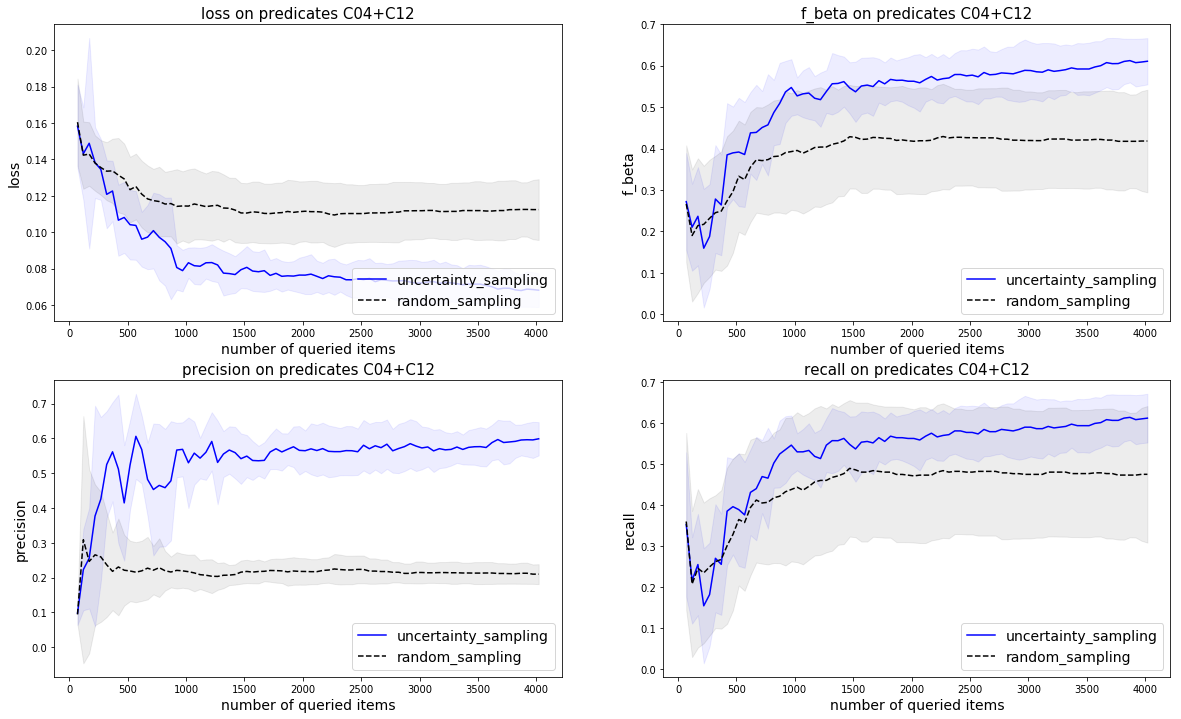

In [10]:
pred = ['C04', 'C12']
file_name = 'screening_al_{}_{}.csv'.format(pred[0], pred[1])
plot(file_name, pred)